# MAN
Toutes les questions jusqu'à la 8 sont faites, il ne reste que les question 9, 10 et 11 et quelques détails:
- comment visualiser graphiquement l'ordre de convergence à la 6
- à la 8 il faut prendre en argument $itermax$ pour faire un algo du point fixe, du coup j'ai fait $itermax$ itérations à chaque fois mais il me semble plus logique de faire la condition "inférieur à epsilon" (en fait jsp ce que c'est l'argument $itermax$)

Je veux bien que tu me relises

# Projet Équations Différentielles

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de la manière suivante:

\begin{align*}
\dot{x}_1 &= x_1 (\alpha - \beta x_2) \\
\dot{x}_2 &= -x_2 (\gamma - \delta x_1) \\
\end{align*}

où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

In [1]:
import autograd
import autograd.numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

#### 1. Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre $(0, 0)$ et $\bar{x} \in \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Que peut-on dire de leur stabilité à ce stade ?

*Interprétation physique des termes :* $\alpha x_1$ est la "vitesse de reproduction" des proies. $\beta x_2 x_1$ est la "vitesse de décès" des proies. $\gamma x_2$ est la "vitesse de décès" des prédateurs. $\delta x_2 x_1$ est la "vitesse de reproduction" des prédateurs.

Soit $(x_1, x_2)$ un point d'équilibre.

Alors $(\dot{x}_1, \dot{x}_2) = (0, 0)$

$\Leftrightarrow
\begin{cases}
x_1 (\alpha - \beta x_2) = 0 \\
-x_2 (\gamma - \delta x_1) = 0 \\
\end{cases}$

$\Leftrightarrow
\begin{cases}
x_1 = 0 \\
x_2 = 0 \\
\end{cases}
\text{ou}$
$\begin{cases}
x_1 = \frac{\gamma}{\delta} \\
x_2 = \frac{\alpha}{\beta} \\
\end{cases}$

Et nous savons que les nombres α, β, γ, δ sont strictement positifs donc soit $(x_1, x_2) = (0, 0)$, soit $\bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) \in \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$.

Par ailleurs, pour $x_1,x_2 \in \mathbb{R}_{+}^{2}$, la jacobienne vaut $J(x_1,x_2)=
\begin{pmatrix}
\alpha - \beta x_2 &  -\beta x_1\\
\delta x_2 & -\gamma + \delta x_1\\
 \end{pmatrix}$
 
 - $J(0,0)=
\begin{pmatrix}
\alpha & 0\\
 0 & -\gamma\\
 \end{pmatrix}$.
 
    Donc $J(0,0)$ admet une valeur propre strictement positive qui est $\alpha$. D'où $(0,0)$ est un point d'équilibre instable.
 
 -$J(\bar{x}) = 
\begin{pmatrix}
 0 &  -\beta\gamma/\delta\\
\delta\alpha/\beta & 0 \\
 \end{pmatrix}$.
 
     Soient $\lambda_1, \lambda_2$ les valeurs propres de $J(\bar{x})$. En utilisant la trace et le déterminant de $J(\bar{x})$ on obtient le système : $\begin{cases}
\lambda_1 + \lambda_2 = 0 \\
\lambda_1\lambda_2 = \alpha\gamma \\
\end{cases}$.
    
    Donc $ \lambda_1 = i\sqrt{\alpha\gamma}$ et $ \lambda_2 = -i\sqrt{\alpha\gamma}$. Les parties réelles des valeurs propres de $J(\bar{x})$ étant nulles, on ne peut conclure directement sur la stabilité de $\bar{x}$.
 

#### 2. A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser streamplot pour visualiser le portrait de phase.

In [3]:
alpha = 1
beta = 2
gamma = 3
delta = 4

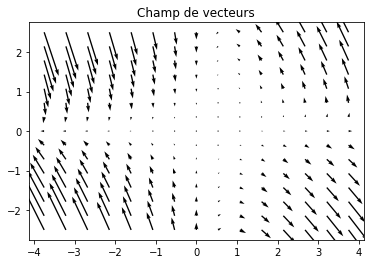

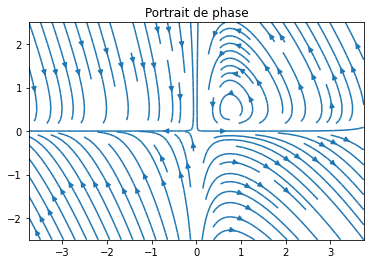

In [4]:
x1 = np.linspace(-5*gamma/delta, 5*gamma/delta, 15)
x2 = np.linspace(-5*alpha/beta, 5*alpha/beta, 15)
X, Y = np.meshgrid(x1, x2)
U, V = X*(alpha - beta*Y), -Y*(gamma - delta*X)

plt.title('Champ de vecteurs')
plt.quiver(X, Y, U, V);
plt.show();
plt.title('Portrait de phase')
plt.streamplot(X, Y, U, V);

D'après les graphes, le point d'équilibre $\bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ semble être un point d'équilibre localement asymptotiquement stable. Nous confirmons le résultat de la question précédente, à savoir que le point d'équilibre $(x_1, x_2) = (0, 0)$ est instable.

De plus, les solutions initialisées dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ vont rester dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ et converger vers $\bar{x}$. Les solutions initialisées en dehors de $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ semblent diverger.

#### 3. Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ reste dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ sur son ensemble de définition.

Considérons le problème de Cauchy défini par les équations de Lotka-Volterra et par la condition initiale $x_0 = x(t_0) \in \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Soit une solution $x$ définie sur $I \subset \mathbb{R}$, on appelle $x^*$ la solution maximale associée définie sur $J$, avec $I \subset J$.  Raisonnons par l'absurde. Supposons que la solution $x$ sort de l'ensemble $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Comme la solution est continue, cela veut dire qu'il existe $t_1 \in I$ tel que $x(t_1) = (x_1, x_2)$ avec

$\begin{cases}
x_1 = 0 \\
x_2 \in \mathbb{R}_{+}^{*} \\
\end{cases}$
ou
$\begin{cases}
x_1 \in \mathbb{R}_{+}^{*} \\
x_2 = 0 \\
\end{cases}$

Si nous considérons le problème de Cauchy défini par les équations de Lotka-Volterra et par la condition initiale $x(t_1)$ alors il existe une solution maximale pour chacun des cas :

$\begin{cases}
x_1(t) = 0 \\
x_2(t) = \frac{x_2}{e^{-\gamma t_1}}e^{-\gamma t} \\
\end{cases},
\forall t \in \mathbb{R}$

ou bien


$\begin{cases}
x_1(t) = \frac{x_1}{e^{\alpha t_1}}e^{\alpha t} \\
x_2(t) = 0 \\
\end{cases},
\forall t \in \mathbb{R}$

Mais dans chacun des cas le problème de Cauchy admet aussi la solution $x^*$ qui au temps $t_0$ vaut $x_0 = x(t_0) \in \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Or les deux solutions ne sont pas identiques car la solution donnée par la condition initiale $x(t_1)$ ne rentre jamais dans l'espace $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$, ce qui est absurde car le théorème de Cauchy-Lipschitz garantit l'unicité de la solution maximale pour toute condition initiale. En effet, comme la matrice jacobienne
$J(x_1, x_2)=
\begin{pmatrix}
\alpha - \beta x_2 &  -\beta x_1\\
\delta x_2 & -\gamma + \delta x_1\\
\end{pmatrix}$
est définie et continue, $f$ est continûment différentiable par rapport à $x$ donc le théorème s'applique.

On en conclut que toute solution initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ reste dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ sur son ensemble de définition.

#### 4. On considère la fonction $$H(x_1, x_2) = \delta x_1 − \gamma \ln{x_1} + \beta x_2 − \alpha \ln{x_2}$$ 

#### définie sur $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ est définie sur $\mathbb{R}$.

Soit $(x_1, x_2) \in \mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ on a

$\nabla H(x_1, x_2) = \begin{pmatrix}
\delta - \gamma/x_1 \\
\beta - \alpha/x_2 \\
\end{pmatrix}$

et
$f(x_1, x_2) =
\begin{pmatrix}
\dot{x_1} \\
\dot{x_2} \\
\end{pmatrix} =
\begin{pmatrix}
x_1 (\alpha - \beta x_2) \\
-x_2 (\gamma - \delta x_1) \\
\end{pmatrix}$

Donc

$\frac{d}{dt} H(x(t)) =
\langle \nabla H(x_1, x_2), f(x_1, x_2) \rangle$

$= (\delta -\gamma/x_1) x_1 (\alpha - \beta x_2) - (\beta - \alpha/x_2) x_2 (\gamma - \delta x_1)$

$= \delta x_1 (\alpha - \beta x_2) - \gamma (\alpha - \beta x_2) - \beta x_2 (\gamma - \delta x_1) + \alpha (\gamma - \delta x_1)$

$= 0$

Par conséquent, si la solution est initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$, nous savons que $\exists c \in \mathbb{R}$ tel que $\forall t \in I, H(x(t)) = c$, où $I$ est le domaine de définition de $x$.

Considérons l'ensemble de niveau $c$ de $H$ : 
$E=
\{(x_1,x_2) \in \mathbb{R}_{+}^2 \; | \; H(x_1, x_2) = c\}.
$
Nous savons que si la solution est initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$, alors elle reste dans l'ensemble $E$.

Comme $H$ est continue et $E$ est l'image réciproque par $H$ du singleton fermé $\lbrace c \rbrace$, alors $E$ est fermé.

Comme $H(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$ par croissances comparées, alors il existe $A>0$ tel que $\forall{(x_1,x_2)} \in \mathbb{R}^2, \|(x_1,x_2)\| \ge A \Rightarrow H(x_1,x_2) > c.$ 
Donc, par contraposée, $(x_1,x_2) \in E \Rightarrow \|(x_1,x_2)\| < A.$ 
D'où $E$ est borné.

Ainsi, $E$ est fermé borné.

Or, comme $f$ est continue sur $\mathbb{R}^2$, le théorème du domaine maximal d'existence nous permet de savoir que la seule raison pour laquelle une solution maximale ne soit pas définie sur $\mathbb{R}$ tout entier est qu'elle explose en temps fini, ce qui est impossible ici.

On en conclut que toute solution maximale initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$ est définie sur $\mathbb{R}$.

#### 5. Représenter les courbes de niveau de $H$. Où se trouve $\bar{x}$ ? Qu’en conclue-t-on sur le comportement des solutions ? En déduire (graphiquement) que $\bar{x}$ est stable, au sens de la définition de stabilité.

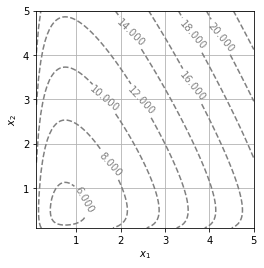

In [5]:
def H(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return delta*x1 - gamma*np.log(x1) + beta*x2 -alpha*np.log(x2)

display_contour(
        H, 
        x=np.linspace(0.1, 5.0, 100), 
        y=np.linspace(0.1, 5.0, 100), 
        levels=10)

D'après la question précédente, nous savons que si $x$ est solution, alors il appartient à un ensemble de niveau de la fonction $H$.

Nous vérifions graphiquement que lorsque la solution est initialisée dans $\mathbb{R}_{+}^{*} \times \mathbb{R}_{+}^{*}$, les ensembles de niveau sont fermés et bornés. Comme les valeurs prises par les solutions sont incluses dans ces ensembles de niveau, elles sont aussi bornées sur $\mathbb{R}$.

De plus, le point d'équilibre $\bar{x}$ est un minimum de la fonction $H$ et pour un ensemble de niveau $E$ donné, la distance d'un point de $E$ au point $\bar{x}$ est majorée. Ainsi, pour tout $\epsilon > 0$, il existe un ensemble de niveau tel que la distance du point $\bar{x}$ à chaque élément de cet ensemble soit inférieure à $\epsilon$, donc $\bar{x}$ est stable.

#### 6. Coder une fonction du type

$\text{def  solve_euler_explicit }(f, x_0, dt, t_0, t_f): \\
...\\
\text{return  } t, x$

#### prenant en entrée une fonction $ f : \mathbb{R}\times\mathbb{R}^n \longrightarrow \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d’Euler explicite appliqué à $\dot{x} = f(t, x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

In [6]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = []
    x = []
    while t0 < tf:
        funct = f(t0, x0)
        l = []
        for i in range(len(x0)):
            x0[i] += dt*funct[i]
            l.append(x0[i])
        t0 += dt
        x.append(l)
        t.append(t0)
    t, x = np.array(t), np.array(x)
    return t, x

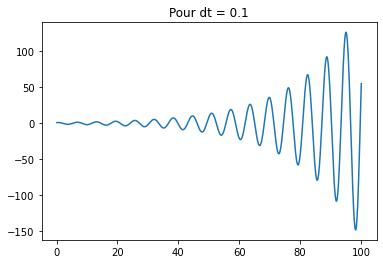

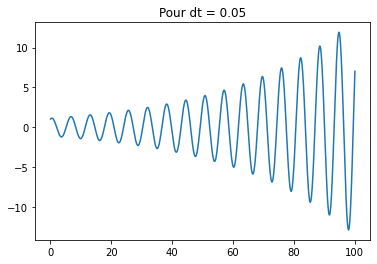

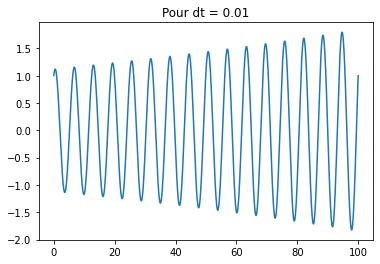

In [7]:
#équation différentielle du deuxième ordre du type
#f''(t) + f(t) = 0 avec f(0)=1 et f'(0)=0
#solution connue f(t) = cos(t)
def f(t, x):
    return [x[1], -x[0]]

A = solve_euler_explicit(f, [1, 0.5], 0.1, 0.0, 100)
B = solve_euler_explicit(f, [1, 0.5], 0.05, 0.0, 100)
C = solve_euler_explicit(f, [1, 0.5], 0.01, 0.0, 100)
plt.title('Pour dt = 0.1')
plt.plot(A[0], A[1].transpose()[0]);
plt.show()
plt.title('Pour dt = 0.05')
plt.plot(B[0], B[1].transpose()[0]);
plt.show()
plt.title('Pour dt = 0.01')
plt.plot(C[0], C[1].transpose()[0]);

On effectue le test sur un temps relativement grand (100 $\approx 16*2 \pi$). On remarque que la solution obtenue converge vers la solution connue de l'équation différentielle : $x \mapsto \cos{x}$ lorsque l'intervalle de temps $dt$ tend vers 0.

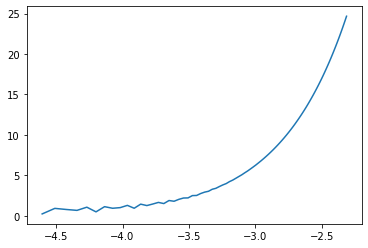

In [8]:
def ordre_convergence(f, x0, t0, tf, dt_min, dt_max):
    ecart_max = []
    liste_dt = []
    while dt_min < dt_max:
        difference_max = 0
        x = solve_euler_explicit(f, x0, dt_min, t0, tf)
        #nous parcourons l'ensemble des valeurs de la différence ||xj - x(tj)|| et nous choisissons le max
        for i in range (len(x[0])):
            difference = np.linalg.norm(x[1][i] - np.cos(x[0][i]))
            if difference_max < difference:
                difference_max = difference
        ecart_max.append(difference_max)
        liste_dt.append(dt_min)
        dt_min += 0.001
    return ecart_max, liste_dt

A = ordre_convergence(f, [1, 0.5], 0, 10, 0.01, 0.1)
Y = np.log(A[0])
X = np.log(A[1])
plt.plot(X, Y);

#### 7. Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka-Volterra. Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction $H$.

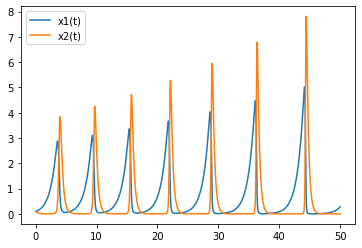

In [9]:
def g(t, x):
    x1, x2 = x[0], x[1]
    return [alpha*x1 - beta*x1*x2, -gamma*x2 + delta*x1*x2]

B = solve_euler_explicit(g, [0.1, 0.1], 0.01, 0.0, 50)

plt.plot(B[0], B[1].transpose()[0], label="x1(t)");
plt.plot(B[0], B[1].transpose()[1], label="x2(t)");
plt.legend();

On constate que l'évolution de $x_1$ au cours du temps suit un modèle qui est répété avec une certaine périodicité, il en est de même pour $x_2$. Cependant, ce modèle varie légèrement puisqu'il n'est pas toujours identique mais admet des variations au fur et à mesure que le temps augmente ; les valeurs prises par $x_1$ et $x_2$ "augmentent" tout en respectant le même modèle.

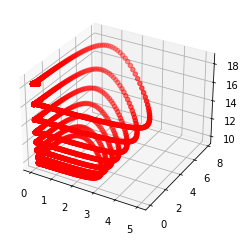

In [10]:
Z = H(B[1].transpose()[0], B[1].transpose()[1])

fig = plt.figure() 
ax = fig.add_subplot(projection='3d')
ax.scatter(B[1].transpose()[0],B[1].transpose()[1], Z, c='r');

On constate qu'il en est de même pour la fonction $H$ : la valeur prise par la fonction augmente progressivement aux temps longs à cause de l'augmentation de $x_1$ et $x_2$.

Dans la réalité, les courbes donnant $x_1$ et $x_2$ devraient répéter le même modèle à l'infini sans variations, et la représentation de $H$ à 3 dimensions devrait être un seul motif déterminé par les valeurs uniques de $x_1$ et $x_2$. La fonction $H$ ne devrait prendre qu'une seule valeur constante puisque $\frac{d}{dt} H = 0$. La représentation à 3D deviendrait alors une représentation à 2D car les solutions représentent un ensemble de niveau de $H$.

#### 8. Coder maintenant une fonction du type

$\text{def  solve_euler_implicit }(f, x_0, dt, t_0, t_f, intermax = 100): \\
...\\
\text{return  } t, x$


#### donnant la solution d’un schéma d’Euler implicite appliqué à $\dot{x} = f(t, x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?


In [11]:
def solve_euler_implicit(f, x0, dt, t0, tf, intermax = 100):
    t = []
    x = []
    xj = x0.copy()
    while t0 < tf:
        #nous définissons la fonction F dont le point fixe est la valeur recherchée
        def F(temps, xj, a):
            L = []
            funct = f(temps, a)
            for i in range(len(x0)):
                L.append(xj[i] + dt*funct[i])
            return L
        #nous affinons pour obtenir la valeur du point fixe avec la certitude souhaitée
        #la fonction F est appliquée avec temps = tj+dt
        t0 += dt
        a, b = F(t0, xj, xj), xj
        #while np.linalg.norm(np.array(b) - np.array(a)) > eps:
        for k in range(intermax):
            b = a
            a = F(t0, xj, b)
        xj = a
        x.append(xj)
        t.append(t0)
    return np.array(t), np.array(x)     

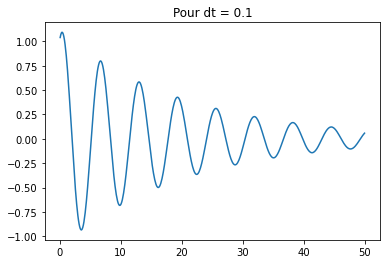

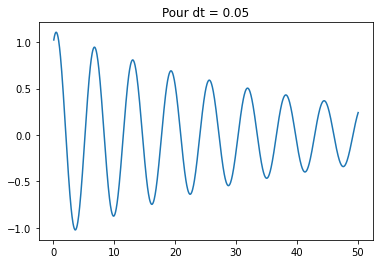

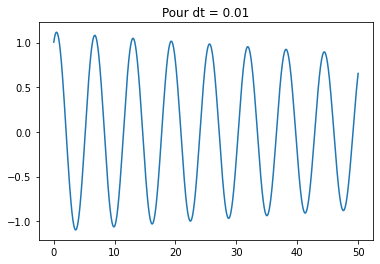

In [12]:
A = solve_euler_implicit(f, [1, 0.5], 0.1, 0.0, 50)
B = solve_euler_implicit(f, [1, 0.5], 0.05, 0.0, 50)
C = solve_euler_implicit(f, [1, 0.5], 0.01, 0.0, 50)
plt.title('Pour dt = 0.1')
plt.plot(A[0], A[1].transpose()[0]);
plt.show()
plt.title('Pour dt = 0.05')
plt.plot(B[0], B[1].transpose()[0]);
plt.show()
plt.title('Pour dt = 0.01')
plt.plot(C[0], C[1].transpose()[0]);

Nous évaluons cette méthode avec la même équation différentielle que précédemment, et nous constatons que lorsque $dt$ tend vers 0 la solution obtenue ici converge aussi vers la solution connue de l'équation différentielle : $x \mapsto \cos{x}$. Cependant, pour une valeur relativement élevée de $dt$, la solution obtenue ne diverge pas aux temps longs mais s'atténue plutôt et décroît jusqu'à s'annuler.

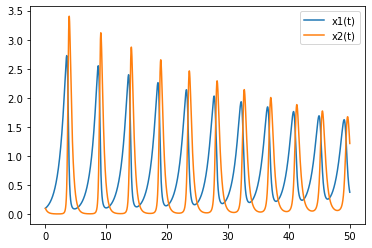

In [13]:
B = solve_euler_implicit(g, [0.1, 0.1], 0.01, 0.0, 50)

plt.plot(B[0], B[1].transpose()[0], label="x1(t)");
plt.plot(B[0], B[1].transpose()[1], label="x2(t)");
plt.legend();

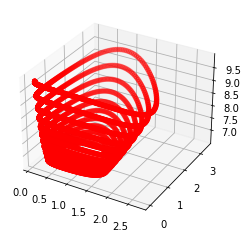

In [14]:
Z = H(B[1].transpose()[0], B[1].transpose()[1])

fig = plt.figure() 
ax = fig.add_subplot(projection='3d')
ax.scatter(B[1].transpose()[0],B[1].transpose()[1], Z, c='r');

La conséquence sur les équations de Lotka-Volterra est que les variations des valeurs obtenues se font en sens inverse de celles obtenues avec la méthode d'Euler explicite : les valeurs prises par $x_1$ et $x_2$ ainsi que la valeur prise par la fonction $H$ diminuent au lieu d'augmenter.

#### 9. Expliquer pourquoi les solutions de 

\begin{align*}
\dot{x}_1 &= x_1 (\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)\\
\dot{x}_2 &= -x_2 (\gamma - \delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0) \\
\end{align*}

#### sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable.

Soit $x$ une solution des équations de Lotka-Volterra. Alors, d'après 4., $H \circ x$ est constante sur le domaine de définition $I$ de $x$. Donc, $\forall t \in I, H(x_1(t),x_2(t)) - H(x(0)) = 0$. Ainsi, pour tout choix de $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable, le système ci-dessus se ramène aux équations de Lotka-Volterra. Donc $x$ en est solution. 

Soit $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable. Soit $h$ telle que le système ci-dessus s'écrive $\dot{x} = h(x)$. Au regard de la matrice jacobienne calculée en 3. du fait que $H$ est continue et du fait que $u$ est continûment différentiable, on a que $h$ est elle-même continûment différentiable. On peut donc appliquer le théorème de Cauchy-Lipshitz au système. Ainsi, $\forall (t_0,x_0) \in \mathbb{R} \times \mathbb{R}_{>0}^2$, il existe une unique solution maximale. 

Or, $\forall (t_0,x_0) \in \mathbb{R} \times \mathbb{R}_{>0}^2$, la solution maximale des équations de Lotka-Volterra est solution du système $\dot{x} = h(x)$ et est définie sur $\mathbb{R}$ d'après 4.. Il s'agit donc de la solution maximale du système $\dot{x} = h(x)$.

Ainsi, les solutions des deux systèmes sont bien identiques pour tout choix de $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable.

#### 10. Soit $H_0 \in \mathbb{R}$. Calculer la dérivée de $H-H_0$ le long des solutions de ce nouveau système. Montrer que l'on peut choisir $u$ tel que

\begin{align*}
\ \frac{d}{dt}(H(x(t))-H_0)&= -k \|\nabla H(x(t)) \|^{2}(H(x(t))-H_0) \\
\end{align*}

#### En déduire qu'alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini si $x$ reste à une distance strictement positive de $\bar{x}$.

Calculons la dérivée de $H-H_0$ le long des solutions du système avec $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable. Soit $x = (x_1,x_2)$ une de ces solutions et $I \subset \mathbb{R}$ son domaine de définition. Pour tout $t \in I$,

$\frac{d}{dt}(H(x(t))-H_0) = \frac{d}{dt}(H(x(t))) = \langle \nabla H(x(t)) | \dot{x}(t) \rangle$.

Or, $\dot{x}(t) = f(x(t)) - (H(x(t))-H_0)u(x(t))$ avec $f(x(t)) = \begin{pmatrix}
  x_1 (\alpha - \beta x_2)\\
 -x_2 (\gamma - \delta x_1)\\
 \end{pmatrix}$ et $\langle \nabla H(x(t)) | f(x(t)) \rangle = 0$ d'après 4. .
 
 Ainsi, $\frac{d}{dt}(H(x(t))-H_0) = - (H(x(t))-H_0) \langle u(x(t) | \nabla H(x(t)) \rangle$.
 
 Par ailleurs, pour tout $x \in \mathbb{R}_{>0}^2, \nabla H(x) = \begin{pmatrix}
  \delta - \gamma \frac{1}{x_1}\\
 \beta - \delta \frac{1}{x_2}\\
 \end{pmatrix}$. Donc $\nabla H$ est continûment différentiable.
 
 En posant, pour $k \in \mathbb{R}$, $u = k\nabla H$, on aboutit à $\frac{d}{dt}(H(x(t))-H_0) = -k \|\nabla H(x(t)) \|^{2}(H(x(t))-H_0), \forall t \in I$.


Supposons que $x$ reste à une distance strictement positive de $\bar{x}$, alors il existe $a \in \mathbb{R}$ tel que $\|x(t)-\bar{x}\| \ge a > 0, \forall t \in I$.

Lorsque $\|x-\bar{x}\| \rightarrow +\infty$, au moins une des deux composantes de $x$ tend vers $+\infty$, donc au moins une des deux composantes de $\nabla H(x)$ converge vers un réel strictement positif ($\delta$ ou $\beta$). Ainsi, il existe $A \ge a$ et $b > 0$ tel que $\forall x \in \mathbb{R}_+^2, \|x-\bar{x}\| \ge A \Rightarrow \|\nabla H(x) \|^{2} \ge b$.

Posons $C = \{x \in \mathbb{R}_{+}^2 | a \le \|x-\bar{x}\| \le A \}$, $C$ est fermé borné. 

Par ailleurs, $\|\nabla H \|^2$ est continue sur $C\setminus\partial(\mathbb{R}_{+}^2)$ et tend vers $+\infty$ sur la frontière  $\partial(\mathbb{R}_{+}^2)$. De plus, $\forall x \in C, \|\nabla H(x) \|^2 > 0$ car $\|\nabla H \|^2$ ne s'annule qu'en $\bar{x}$.

Ainsi, $\|\nabla H \|^2$ admet un minimum $c > 0$ sur $C$.

Posons $m = min(b,c)$, alors $\forall t \in I, \|\nabla H(x(t)) \|^2 \ge m > 0$.

Soit $t \in I$,

- Si $H(x(t)) \ge H_0$, alors $\frac{d}{dt}(\lvert H(x(t))-H_0 \rvert) = -k \|\nabla H(x(t)) \|^{2}\lvert H(x(t))-H_0 \rvert$.

- Si $H(x(t)) < H_0$, alors $\frac{d}{dt}(\lvert H(x(t))-H_0 \rvert) = -\frac{d}{dt}(H(x(t))-H_0) = k \|\nabla H(x(t)) \|^{2}(H(x(t))-H_0) = -k \|\nabla H(x(t)) \|^{2}\lvert H(x(t))-H_0 \rvert$.

Donc, $\forall t \in I, \frac{d}{dt}(\lvert H(x(t))-H_0 \rvert) = -k \|\nabla H(x(t)) \|^{2}\lvert H(x(t))-H_0 \rvert$.


Comme $\forall t \in I, \| \nabla H(x(t)) \|^2 \ge m > 0$,

Alors $\forall t \in I, \frac{d}{dt}(\lvert H(x(t))-H_0 \rvert) \le -k m\lvert H(x(t))-H_0 \rvert$.

Soit $t \in I$, en intégrant l'inégalité entre 0 et $t$, on obtient : $\lvert H(x(t))-H_0 \rvert \le e^{-kmt}$.

Ainsi, $H(x(t))$ converge bien exponentiellement vers $H_0$ lorsque $t$ tend vers $+ \infty$.

#### 11. En déduire comment modifier l’implémentation du schéma d’Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $H(x_{j+1}) − H(x_0)$ en fonction de $H(x_j) − H(x_0)$ au premier ordre en dt.

Exprimons la différence $H(x_{j+1}) - H(x_0)$ à l'aide d'un développement limité. Nous savons que $x_{j}(t+dt) = x_{j+1}(t)$, on en déduit :

$H(x_{j+1}(t)) = H(x_j(t + dt)) = H(x_j(t)) + dt \times \frac{d}{dt}H(x_j(t))$

Donc d'après la question 10.,

$H(x_{j+1}(t + dt)) - H(x_0) = H(x_j(t)) - H(x_0) - dt \times k \|\nabla H(x(t)) \|^{2}(H(x_j(t))-H_0)$

D'où

$H(x_{j+1}) - H(x_0) = (H(x_j) - H(x_0)) \times (1 - dt \times k \|\nabla H(x_j) \|^{2})$

In [32]:
def h(t, x, x0, k):
    x1, x2 = x[0], x[1]
    x01, x02 = x0[0], x0[1]
    difference = H(x1, x2) - H(x01, x02)
    return [alpha*x1 - beta*x1*x2 - k*(delta - gamma/x1)*difference,
            -gamma*x2 + delta*x1*x2 - k*(beta - alpha/x2)*difference]

In [33]:
def solve_euler_explicit(f, x0, dt, t0, tf, k):
    t = []
    x = []
    x00 = x0
    while t0 < tf:
        funct = f(t0, x0, x00, k)
        l = []
        for i in range(len(x0)):
            x0[i] += dt*funct[i]
            l.append(x0[i])
        t0 += dt
        x.append(l)
        t.append(t0)
    t, x = np.array(t), np.array(x)
    return t, x

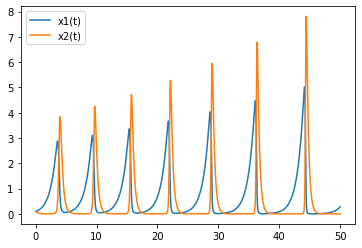

In [34]:
B = solve_euler_explicit(h, [0.1, 0.1], 0.01, 0.0, 50, 0.001)

plt.plot(B[0], B[1].transpose()[0], label="x1(t)");
plt.plot(B[0], B[1].transpose()[1], label="x2(t)");
plt.legend();

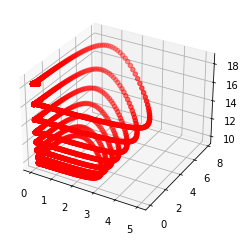

In [35]:
Z = H(B[1].transpose()[0], B[1].transpose()[1])

fig = plt.figure() 
ax = fig.add_subplot(projection='3d')
ax.scatter(B[1].transpose()[0],B[1].transpose()[1], Z, c='r');